In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def naca4digit(chord, m, p, t, num_points=100):
    """
    Generate the coordinates of a NACA 4-digit airfoil.

    Parameters:
    - chord: Chord length.
    - m: Maximum camber as a fraction of the chord.
    - p: Position of maximum camber from the leading edge as a fraction of the chord.
    - t: Maximum thickness as a fraction of the chord.
    - num_points: Number of points to sample on each surface (upper and lower).

    Returns:
    - x, y_upper, y_lower: Coordinates of the airfoil.
    """
    x = np.linspace(0, chord, num_points)
    
    # Thickness distribution
    yt = 5*t*chord*(0.2969*np.sqrt(x/chord) - 0.1260*(x/chord) - 0.3516*(x/chord)**2 + 0.2843*(x/chord)**3 - 0.1015*(x/chord)**4)
    
    # Camber line
    yc = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] < p*chord:
            yc[i] = (m/p**2)*(2*p*(x[i]/chord) - (x[i]/chord)**2)
        else:
            yc[i] = (m/(1-p)**2)*((1-2*p) + 2*p*(x[i]/chord) - (x[i]/chord)**2)
    
    # Camber line slope
    dyc_dx = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] < p*chord:
            dyc_dx[i] = (2*m/p**2)*(p - x[i]/chord)
        else:
            dyc_dx[i] = (2*m/(1-p)**2)*(p - x[i]/chord)
    
    theta = np.arctan(dyc_dx)
    
    # Upper and lower surfaces
    xu = x - yt*np.sin(theta)
    yu = yc + yt*np.cos(theta)
    xl = x + yt*np.sin(theta)
    yl = yc - yt*np.cos(theta)
    
    return xu, yu, xl, yl


In [3]:
# Define airfoil parameters (example: NACA 2412)
chord = 1.0
m = 0.02  # maximum camber
p = 0.4   # position of maximum camber
t = 0.12  # maximum thickness
num_points = 100

xu, yu, xl, yl = naca4digit(chord, m, p, t, num_points)


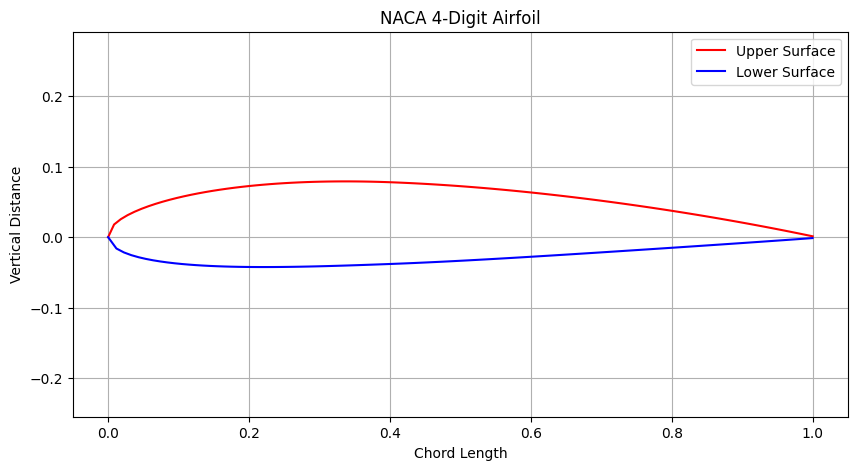

In [4]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(xu, yu, 'r-', label='Upper Surface')
plt.plot(xl, yl, 'b-', label='Lower Surface')
plt.axis('equal')
plt.legend()
plt.xlabel('Chord Length')
plt.ylabel('Vertical Distance')
plt.title('NACA 4-Digit Airfoil')
plt.grid(True)
plt.show()

In [5]:
def generate_interior_points(xu, yu, xl, yl, num_interior_points=1000):
    """
    Generate points inside the airfoil by interpolating between the upper and lower surfaces.

    Parameters:
    - xu, yu: Coordinates of the upper surface.
    - xl, yl: Coordinates of the lower surface.
    - num_interior_points: Number of interior points to generate.

    Returns:
    - x_points, y_points: Coordinates of the points inside the airfoil.
    """
    x_points = []
    y_points = []
    
    for _ in range(num_interior_points):
        # Choose a random x-coordinate
        x = np.random.uniform(low=min(xu), high=max(xu))
        
        # Interpolate to find the corresponding y-values on the upper and lower surfaces
        y_upper = np.interp(x, xu, yu)
        y_lower = np.interp(x, xl, yl)
        
        # Generate a random y-coordinate between the upper and lower y-values
        y = np.random.uniform(low=y_lower, high=y_upper)
        
        x_points.append(x)
        y_points.append(y)
    
    return np.array(x_points), np.array(y_points)

In [6]:
xu, yu, xl, yl = naca4digit(chord=1.0, m=0.02, p=0.4, t=0.12, num_points=100)

# Generate interior points
num_interior_points = 1000
x_points, y_points = generate_interior_points(xu, yu, xl, yl, num_interior_points)

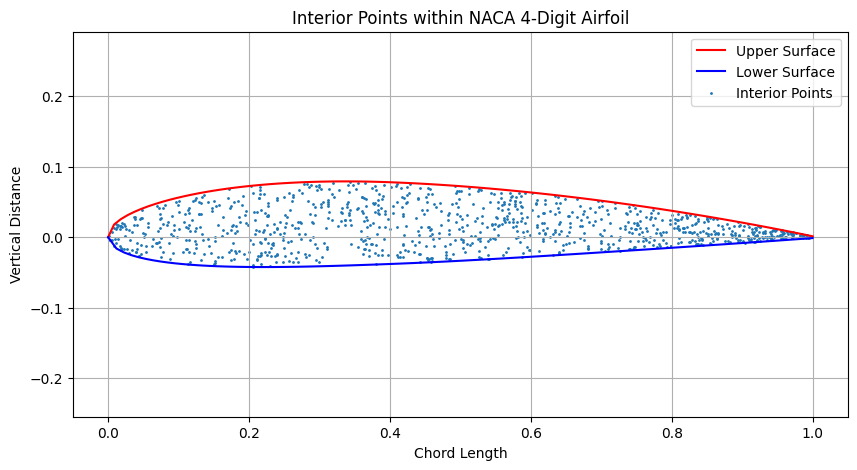

In [7]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(xu, yu, 'r-', label='Upper Surface')
plt.plot(xl, yl, 'b-', label='Lower Surface')
plt.scatter(x_points, y_points, s=1, label='Interior Points')
plt.axis('equal')
plt.legend()
plt.xlabel('Chord Length')
plt.ylabel('Vertical Distance')
plt.title('Interior Points within NACA 4-Digit Airfoil')
plt.grid(True)
plt.show()

In [8]:
def classify_points(xu, yu, xl, yl, points):
    """
    Classifies pre-sampled points as either interior or exterior relative to an airfoil.

    Parameters:
    - xu, yu: Coordinates of the upper surface of the airfoil.
    - xl, yl: Coordinates of the lower surface of the airfoil.
    - points: Array of points to classify, shaped as (n, 2), where n is the number of points,
              and each point is [x, y].

    Returns:
    - interior_points: Points that are inside the airfoil.
    - exterior_points: Points that are outside the airfoil.
    """
    interior_points = []
    exterior_points = []
    
    for x, y in points:
        y_upper = np.interp(x, xu, yu, left=np.nan, right=np.nan)
        y_lower = np.interp(x, xl, yl, left=np.nan, right=np.nan)
        
        if np.isnan(y_upper) or np.isnan(y_lower):
            exterior_points.append([x, y])
        elif y_lower <= y <= y_upper:
            interior_points.append([x, y])
        else:
            exterior_points.append([x, y])
    
    return np.array(interior_points), np.array(exterior_points)

In [9]:
def plot_classification(xu, yu, xl, yl, interior_points, exterior_points):
    """
    Plots the classification of points as interior or exterior to the airfoil.

    Parameters:
    - xu, yu, xl, yl: Coordinates of the airfoil surfaces.
    - interior_points: Points classified as interior.
    - exterior_points: Points classified as exterior.
    """
    plt.figure(figsize=(12, 6))
    plt.fill_between(xu, yu, yl, color='skyblue', label='Airfoil')
    if len(exterior_points) > 0:
        plt.scatter(exterior_points[:, 0], exterior_points[:, 1], s=1, color='green', label='Exterior Points')
    if len(interior_points) > 0:
        plt.scatter(interior_points[:, 0], interior_points[:, 1], s=1, color='red', label='Interior Points')
    plt.legend()
    plt.xlabel('Chord Length')
    plt.ylabel('Vertical Distance')
    plt.title('Classified Points Relative to an Airfoil')
    plt.grid(True)
    plt.show()

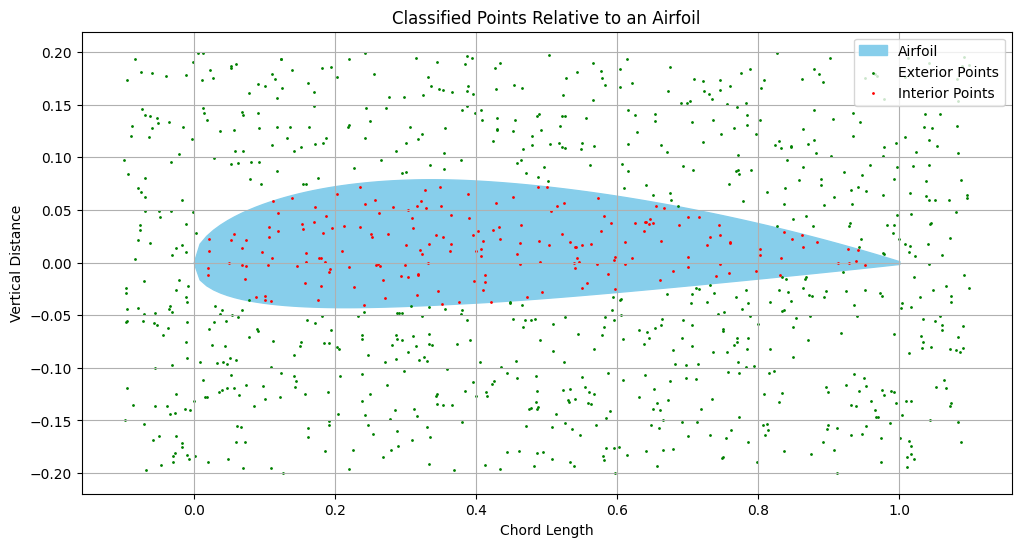

In [10]:
# Sample points for classification
points = np.random.rand(1000, 2)
points[:, 0] = points[:, 0] * 1.2 - 0.1  # Scale x between -0.1 and 1.1
points[:, 1] = points[:, 1] * 0.4 - 0.2  # Scale y between -0.2 and 0.2

interior_points, exterior_points = classify_points(xu, yu, xl, yl, points)
plot_classification(xu, yu, xl, yl, interior_points, exterior_points)